<a href="https://colab.research.google.com/github/Peaceokk/prototype2/blob/main/ASSIGNMENT_1_prashantmaharjan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Concept AI

/content/drive/MyDrive/Concept AI


In [ ]:
!ls

ASSIGNMENT-1.ipynb  banknumericdata.csv  medical_students.csv  workshop2.ipynb
bank.csv	    genetics_data.csv	 WHR-2024-5CS037.csv   workshop4.ipynb


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('WHR-2024-5CS037.csv')
print(df.head(10))

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

In [ ]:
# 1.2 Identify the number of rows and columns
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 143
Number of Columns: 9


In [ ]:
# 1.3 List all columns and their data types
print(df.dtypes)

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [ ]:
# 2. Basic Statistics
# 2.1 Calculate mean, median, and standard deviation for the Score column
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()

print(f"Mean Score: {mean_score}")
print(f"Median Score: {median_score}")
print(f"Standard Deviation of Score: {std_score}")

Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation of Score: 1.1707165099442995


In [ ]:
# 2.2 Identify the country with the highest and lowest happiness scores
max_score_country = df.loc[df['score'].idxmax(), 'Country name']
min_score_country = df.loc[df['score'].idxmin(), 'Country name']

print(f"Country with Highest Score: {max_score_country}")
print(f"Country with Lowest Score: {min_score_country}")


Country with Highest Score: Finland
Country with Lowest Score: Afghanistan


In [ ]:
# 3. Missing Values
# 3.1 Check if there are any missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
# 4. Filtering and Sorting
# 4.1 Filter the dataset for countries with a Score greater than 7.5
filtered_df = df[df['score'] > 7.5]
print(filtered_df)


  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [ ]:

# 4.2 Sort by GDP per Capita in descending order and display top 10
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False).head(10)
print(sorted_df)

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [ ]:
# 5. Adding New Columns
# 5.1 Create a new column "Happiness Category"
df['Happiness Category'] = pd.cut(df['score'], bins=[0, 4, 6, 10], labels=['Low', 'Medium', 'High'])

print(df[['Country name', 'score', 'Happiness Category']].head(10))

  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


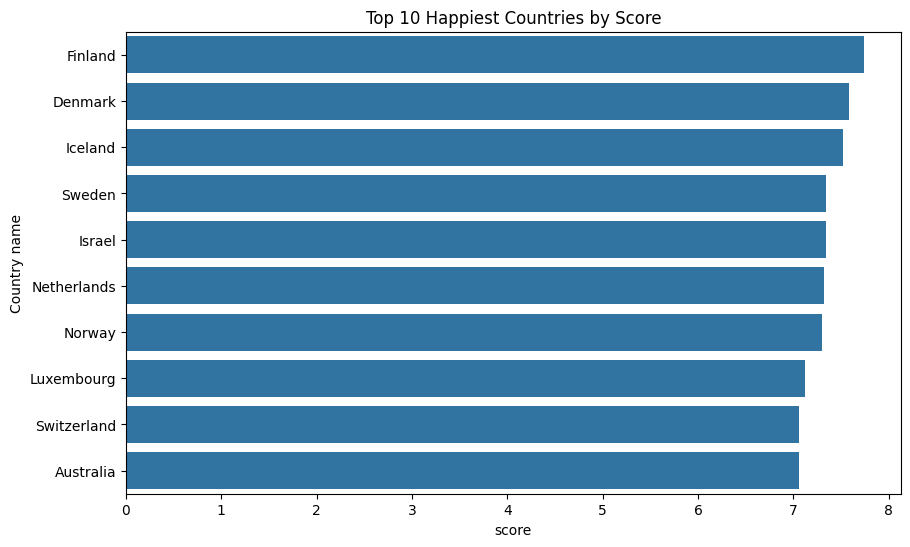

In [ ]:
# 6. Data Visualizations
# 6.1 Bar Plot: Top 10 happiest countries by Score
top_10_happiest = df.nlargest(10, 'score')
plt.figure(figsize=(10,6))
sns.barplot(x='score', y='Country name', data=top_10_happiest)
plt.title("Top 10 Happiest Countries by Score")
plt.show()

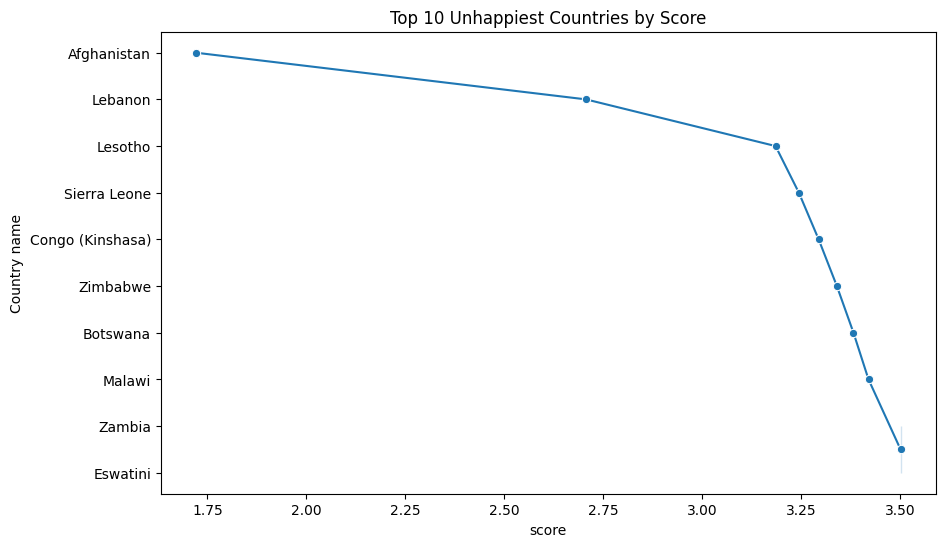

In [ ]:


# 6.2 Line Plot: Top 10 unhappiest countries by Score
top_10_unhappiest = df.nsmallest(10, 'score')
plt.figure(figsize=(10,6))
sns.lineplot(x='score', y='Country name', data=top_10_unhappiest, marker='o')
plt.title("Top 10 Unhappiest Countries by Score")
plt.show()

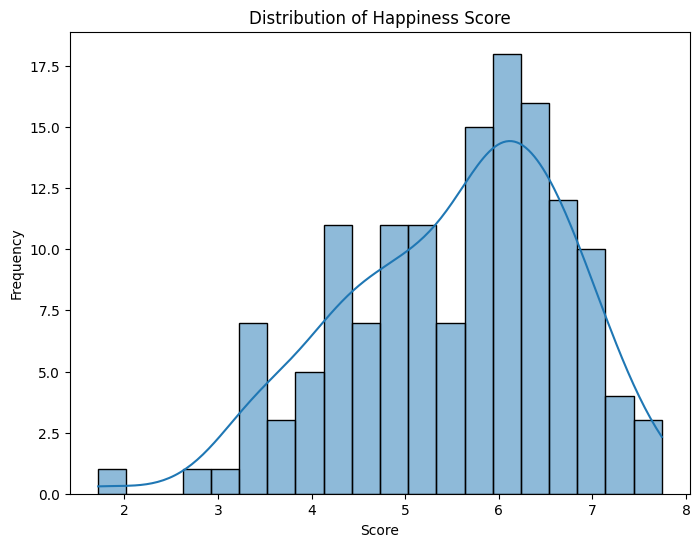

In [ ]:
# 6.3 Histogram: Distribution of the Score
plt.figure(figsize=(8,6))
sns.histplot(df['score'], bins=20, kde=True)
plt.title("Distribution of Happiness Score")
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

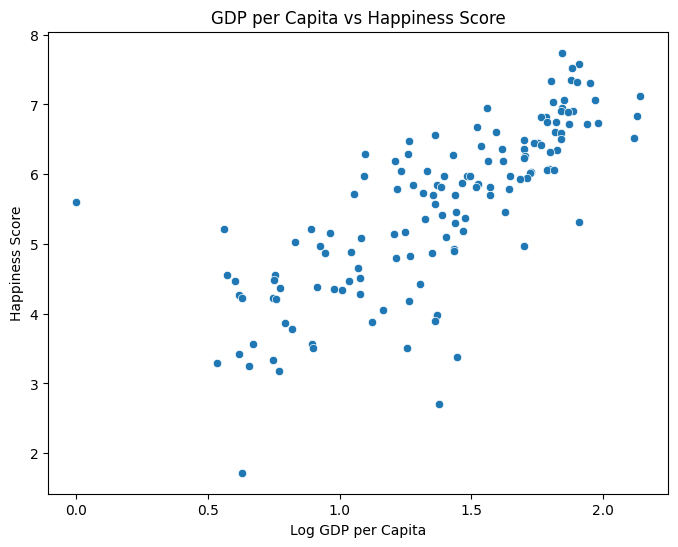

In [ ]:

# 6.4 Scatter Plot: GDP per Capita vs Score
plt.figure(figsize=(8,6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df)
plt.title("GDP per Capita vs Happiness Score")
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()


In [ ]:
# 7. Advanced Data Exploration

# 7.1 South Asia Dataset
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

south_asia_df = df[df['Country name'].isin(south_asian_countries)]

In [ ]:

# 7.2 Save South Asia Dataset
south_asia_df.to_csv('South_Asia_Happiness.csv', index=False)

In [ ]:
# 7.3 Composite Score for South Asia
south_asia_df['Composite Score'] = 0.40 * south_asia_df['Log GDP per capita'] + \
                                   0.30 * south_asia_df['Social support'] + \
                                   0.30 * south_asia_df['Healthy life expectancy']

# Rank South Asian countries based on Composite Score
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)
print(south_asia_df[['Country name', 'Composite Score']])


    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


<ipython-input-32-237bf6222261>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = 0.40 * south_asia_df['Log GDP per capita'] + \


<ipython-input-33-ddc9ec333400>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country name', data=top_5_south_asia, palette='Blues_d')


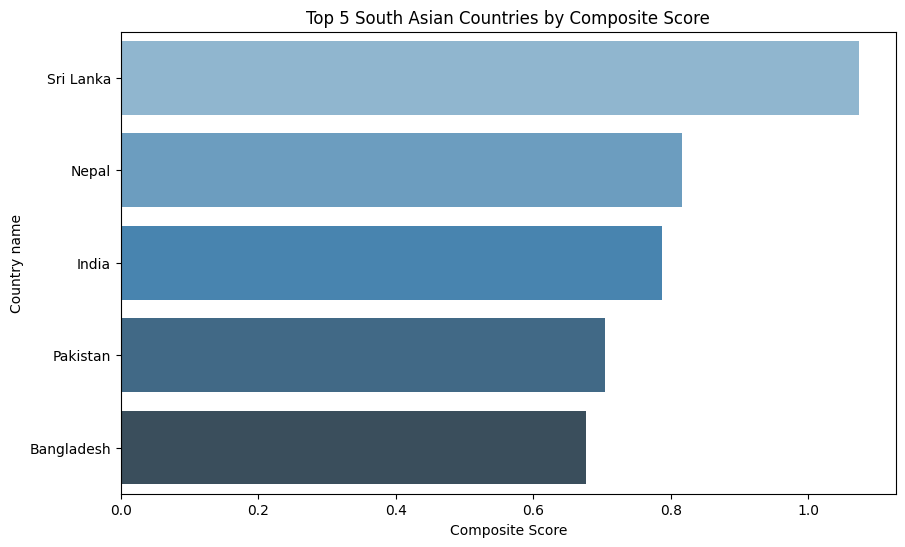

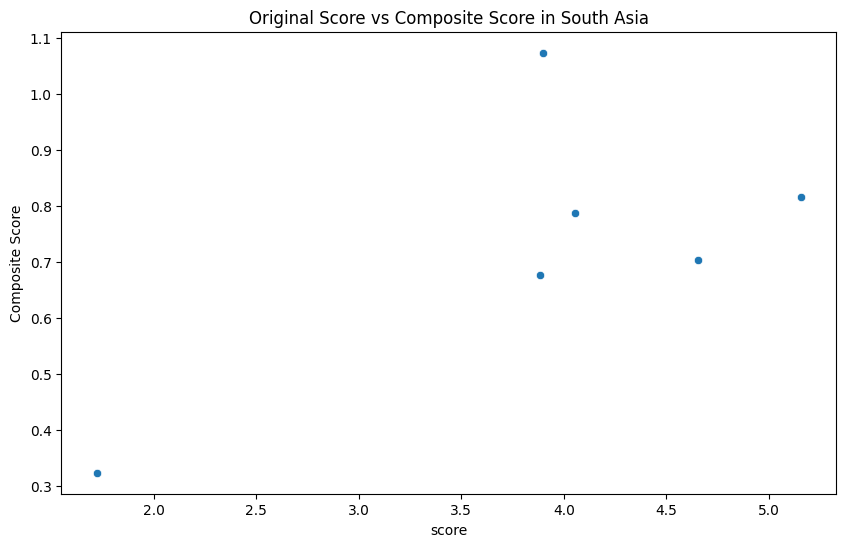

In [ ]:
# 7.4 Top 5 Countries by Composite Score
top_5_south_asia = south_asia_df.head(5)
plt.figure(figsize=(10,6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_south_asia, palette='Blues_d')
plt.title("Top 5 South Asian Countries by Composite Score")
plt.show()

# Compare original score with composite score
plt.figure(figsize=(10,6))
sns.scatterplot(x='score', y='Composite Score', data=south_asia_df)
plt.title("Original Score vs Composite Score in South Asia")
plt.show()

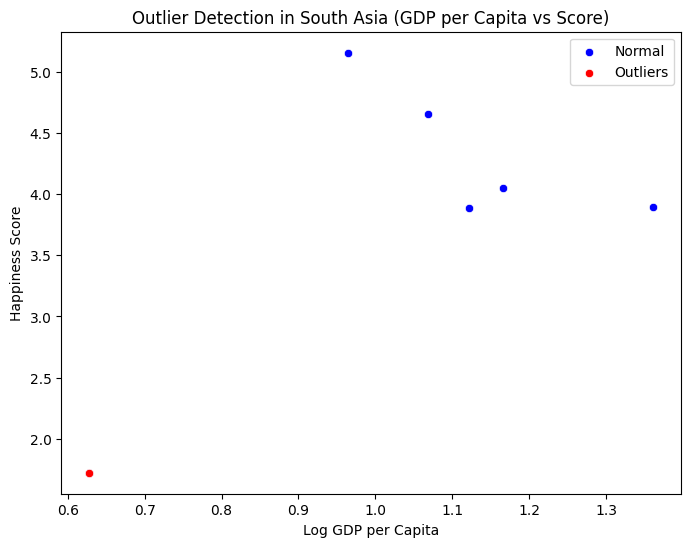

In [ ]:
# 7.5 Outlier Detection
Q1 = south_asia_df['Log GDP per capita'].quantile(0.25)
Q3 = south_asia_df['Log GDP per capita'].quantile(0.75)
IQR = Q3 - Q1

outliers = south_asia_df[(south_asia_df['Log GDP per capita'] < (Q1 - 1.5 * IQR)) |
                         (south_asia_df['Log GDP per capita'] > (Q3 + 1.5 * IQR))]

plt.figure(figsize=(8,6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, color='blue', label='Normal')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='red', label='Outliers')
plt.title("Outlier Detection in South Asia (GDP per Capita vs Score)")
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()